In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

# Path for my Archive folder
from config import Archive_Path

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Importar os Dados

In [3]:
data_background = pd.read_hdf(join(Archive_Path, "Data.h5"), key='bkgd').reset_index(drop=True)
data_signal = pd.read_hdf(join(Archive_Path,"Data.h5"), key='signal').reset_index(drop=True)

In [4]:
data_background.describe()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,MissingET_Phi,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT,gen_weights
count,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,...,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06,4.245075e+06
mean,1.144244e-04,3.859111e+01,1.084335e-03,6.578391e-05,9.697738e+00,1.264110e-05,8.245510e-01,4.101399e-04,7.257056e+00,3.065015e+01,...,-9.000460e-04,4.498187e-04,5.110581e+01,-6.180218e-04,4.014672e-05,1.617111e+01,-3.028545e-05,1.188113e+00,3.605171e+02,8.124088e-06
std,8.418525e-01,4.644635e+01,1.370063e+00,5.749829e-01,2.003727e+01,9.116318e-01,8.106689e-01,3.812480e-01,2.411029e+01,9.142469e+01,...,1.813783e+00,9.935177e-01,4.688299e+01,1.571220e+00,7.781081e-01,2.316157e+01,1.194959e+00,8.122001e-01,1.834634e+02,1.420050e-05
min,-2.499997e+00,0.000000e+00,-3.141592e+00,-2.499985e+00,0.000000e+00,-3.141592e+00,0.000000e+00,-4.000467e+00,-5.285799e-05,0.000000e+00,...,-3.141591e+00,-2.399985e+00,0.000000e+00,-3.141592e+00,-2.399981e+00,0.000000e+00,-3.141588e+00,0.000000e+00,4.447565e+01,3.941200e-08
25%,-1.928962e-01,0.000000e+00,-3.839418e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.571305e+00,-5.635411e-01,1.028139e+01,-1.048443e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.310312e+02,1.811693e-07
50%,0.000000e+00,2.859756e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.040939e-03,0.000000e+00,4.753570e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.254956e+02,5.028781e-06
75%,1.953454e-01,6.321899e+01,3.898618e-01,0.000000e+00,1.121624e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.569735e+00,5.642138e-01,7.347187e+01,1.046109e+00,0.000000e+00,3.038062e+01,0.000000e+00,2.000000e+00,4.480336e+02,7.089469e-06
max,2.499979e+00,1.451913e+03,3.141593e+00,2.499981e+00,5.076544e+02,3.141575e+00,5.000000e+00,3.873402e+00,5.243948e+02,1.723009e+03,...,3.141591e+00,2.399990e+00,1.249431e+03,3.141587e+00,2.399961e+00,6.135786e+02,3.141591e+00,4.000000e+00,3.903838e+03,8.083906e-05


In [5]:
data_signal.describe()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,MissingET_Phi,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT,gen_weights
count,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,...,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,195725.000000,1.957250e+05
mean,-0.002376,93.874797,0.002506,-0.001356,24.843815,-0.000378,1.003965,-0.000878,39.842755,214.031343,...,-0.011142,-0.002890,122.098796,0.008965,-0.002141,36.443064,0.000233,1.373611,608.585528,1.286454e-09
std,0.956811,135.176460,1.411901,0.677618,50.790100,1.049370,0.959648,0.882671,48.378385,246.652396,...,1.811996,1.084205,147.214662,1.571437,0.853159,58.101179,1.274687,1.002467,371.896309,2.067957e-25
min,-2.499965,0.000000,-3.141324,-2.499727,0.000000,-3.141587,0.000000,-3.494491,-0.000061,0.000000,...,-3.141550,-2.399990,0.000000,-3.141585,-2.399888,0.000000,-3.141572,0.000000,51.668472,1.286454e-09
25%,-0.343061,0.000000,-0.539507,0.000000,0.000000,0.000000,0.000000,-0.127633,0.000000,0.000000,...,-1.575856,-0.684100,0.000000,-1.031103,0.000000,0.000000,0.000000,0.000000,354.401245,1.286454e-09
50%,0.000000,43.226986,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.294422,216.051682,...,-0.017987,0.000000,79.353065,0.000000,0.000000,0.000000,0.000000,1.000000,512.929443,1.286454e-09
75%,0.332078,138.506805,0.549541,0.000000,32.493484,0.000000,2.000000,0.119289,91.306366,354.365540,...,1.557150,0.672683,175.863571,1.061248,0.000000,53.818260,0.000000,2.000000,753.832581,1.286454e-09
max,2.499960,2124.003174,3.141387,2.499523,998.448608,3.141527,5.000000,3.708754,732.435364,2939.618408,...,3.141546,2.399966,2646.508301,3.141582,2.399788,1217.265381,3.141448,5.000000,4926.052246,1.286454e-09


### Os dados ainda não estao prontos, basta olhar para a mean != 0..

In [6]:
# Adicionar uma coluna de Signal -> 0 se for background e 1 se for signal
data_background['Signal'] = pd.Series([0 for x in range(len(data_background.index))])
data_signal['Signal'] = pd.Series([1 for x in range(len(data_signal.index))])

In [7]:
# Vamos dar juntar tudo na variavel "Data" - Tem os dados, as labels e os Weights
Data = data_background.append(data_signal).rename(columns={'gen_weights':'Weights'})

In [8]:
Data.describe()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT,Weights,Signal
count,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,...,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06,4.440800e+06
mean,4.642362e-06,4.102770e+01,1.146982e-03,3.100396e-06,1.036529e+01,-4.581339e-06,8.324586e-01,3.533756e-04,8.693247e+00,3.873254e+01,...,3.026105e-04,5.423478e+01,-1.956640e-04,-5.599270e-05,1.706459e+01,-1.866145e-05,1.196289e+00,3.714505e+02,7.766081e-06,4.407427e-02
std,8.472479e-01,5.473847e+01,1.371933e+00,5.798893e-01,2.252014e+01,9.181378e-01,8.186355e-01,4.162720e-01,2.652501e+01,1.099466e+02,...,9.976884e-01,5.717222e+01,1.571230e+00,7.815677e-01,2.605593e+01,1.198585e+00,8.223965e-01,2.021479e+02,1.398379e-05,2.052602e-01
min,-2.499997e+00,0.000000e+00,-3.141592e+00,-2.499985e+00,0.000000e+00,-3.141592e+00,0.000000e+00,-4.000467e+00,-6.103516e-05,0.000000e+00,...,-2.399990e+00,0.000000e+00,-3.141592e+00,-2.399981e+00,0.000000e+00,-3.141588e+00,0.000000e+00,4.447565e+01,1.286454e-09,0.000000e+00
25%,-1.986022e-01,0.000000e+00,-3.912720e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.680689e-01,1.020456e+01,-1.047653e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.342856e+02,1.811693e-07,0.000000e+00
50%,0.000000e+00,2.898474e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.799751e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.308271e+02,5.028781e-06,0.000000e+00
75%,2.005566e-01,6.450357e+01,3.971428e-01,0.000000e+00,1.263088e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.684932e-01,7.523514e+01,1.046757e+00,0.000000e+00,3.088431e+01,0.000000e+00,2.000000e+00,4.581491e+02,7.089469e-06,0.000000e+00
max,2.499979e+00,2.124003e+03,3.141593e+00,2.499981e+00,9.984486e+02,3.141575e+00,5.000000e+00,3.873402e+00,7.324354e+02,2.939618e+03,...,2.399990e+00,2.646508e+03,3.141587e+00,2.399961e+00,1.217265e+03,3.141591e+00,5.000000e+00,4.926052e+03,8.083906e-05,1.000000e+00


In [9]:
# Apagar variaveis para poupar espaço
del data_background
del data_signal

## Data preprocessing done! Let's start with the ML model

In [10]:
# Separar em training e test set
X_train, X_test, y_train, y_test = train_test_split(
        Data.drop(columns=['Signal']), 
        Data['Signal'], 
        test_size=0.5)
# Release RAM
del Data

Standardization of the data

In [11]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())
        
std_layer = Standardization()
std_layer.adapt(X_train.drop(columns=['Weights']).to_numpy())

Definir as class_weights para os dados de treino

In [12]:
class_weights = {
    0: 1,
    1: len([x for x in y_train if x == 0]) / len([x for x in y_train if x == 1]) 
    # Nº de elementos da classe de referencia a dividir pelo nº de elementos da classe atual
    # Ref = sinal
}

In [13]:
class_weights

{0: 1, 1: 21.700691121743752}

Build the model

In [14]:
inputs = keras.layers.Input(shape=(69,))
std = std_layer

l1 = keras.layers.Dense(100, activation='relu')(inputs)
d1 = keras.layers.Dropout(0.2)(l1, training=True)

l2 = keras.layers.Dense(100, activation='relu')(d1)
d2 = keras.layers.Dropout(0.2)(l2, training=True)

l3 = keras.layers.Dense(100, activation='relu')(d2)
d3 = keras.layers.Dropout(0.2)(l3, training=True)

outputs = keras.layers.Dense(1, activation='sigmoid')(d3)


model = keras.Model(inputs, outputs)

model.compile(
              optimizer='adam', 
              loss="binary_crossentropy", 
              metrics=["accuracy", keras.metrics.AUC()]
              )

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 69)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               7000      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0     

In [16]:
import time
# Copiado do Gilberto
# Model name
name = str(time.time())

# Tensorboard
TB = keras.callbacks.TensorBoard("logs/" + name, write_images=True)

# Early Stopping
ES = keras.callbacks.EarlyStopping(monitor="loss", patience=5, verbose=2, mode="min")

# Model Checkpoint
MC = keras.callbacks.ModelCheckpoint("models/" + name + ".h5", save_best_only=True, monitor="val_loss",
                                     mode="min")

In [18]:

history = model.fit(
    x=X_train.drop(columns=['Weights']).to_numpy(),
    y=y_train,
    epochs=10,
    # batch_size=1024,
    shuffle=True,
    class_weight=class_weights,
    callbacks=[TB, ES],
    sample_weight=X_train['Weights'].to_numpy()
    )
        

Epoch 1/10
69388/69388 [==============================] - 166s 2ms/step - loss: 1.4981e-08 - accuracy: 0.9560 - auc: 0.5906
Epoch 2/10
69388/69388 [==============================] - 164s 2ms/step - loss: 1.2864e-08 - accuracy: 0.9560 - auc: 0.6320
Epoch 3/10
69388/69388 [==============================] - 164s 2ms/step - loss: 1.1640e-08 - accuracy: 0.9560 - auc: 0.6605
Epoch 4/10
69388/69388 [==============================] - 164s 2ms/step - loss: 1.0874e-08 - accuracy: 0.9560 - auc: 0.6794
Epoch 5/10
69388/69388 [==============================] - 166s 2ms/step - loss: 1.0282e-08 - accuracy: 0.9561 - auc: 0.6923
Epoch 6/10
69388/69388 [==============================] - 160s 2ms/step - loss: 9.9598e-09 - accuracy: 0.9561 - auc: 0.6485
Epoch 7/10
69388/69388 [==============================] - 177s 3ms/step - loss: 9.7288e-09 - accuracy: 0.9561 - auc: 0.6337
Epoch 8/10
69388/69388 [==============================] - 178s 3ms/step - loss: 9.6882e-09 - accuracy: 0.9563 - auc: 0.6205
Epoch 9/

### Saving the Model

In [19]:
model.save_weights("weights")
model.save("model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [20]:
model.load_weights("weights")

## Metrics 

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [22]:
y_preds = model.predict(X_test.drop(columns=['Weights']).values, batch_size=1024).reshape(-1)

In [23]:
accuracy_score(y_test.values, y_preds.round())

0.9559840569266799

### Confusion matrix
-> Background is the positive class

-> Signal is the negative class

<img src=https://cdn.discordapp.com/attachments/710910920460599327/734843424666288228/confusionMatrxiUpdated.png width="600">

In [24]:
confusion_matrix(y_test.values, y_preds.round())

array([[2122487,       0],
       [  97733,     180]])

In [25]:
confusion_matrix(y_test.values, y_preds.round(), normalize="all")

array([[9.55902990e-01, 0.00000000e+00],
       [4.40159431e-02, 8.10664745e-05]])

In [26]:
precision_score(y_test.values, y_preds.round())

1.0

In [27]:
recall_score(y_test.values, y_preds.round())

0.0018383667133067111

### Plotting Roc Curve
#### Link for more information - https://www.youtube.com/watch?v=4jRBRDbJemM
#### An Example:

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png width="400">

<img src=img/tpr.png width="500">

<img src=img/fpr.png width="500">

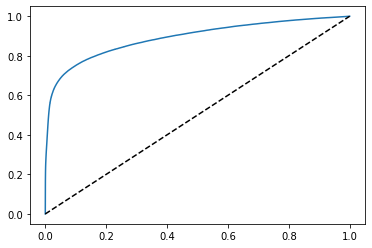

In [28]:
from sklearn.metrics import roc_curve

# fpr = False positive rate
# tpr = True positive rate
fpr, tpr, thr = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()

# Monte Carlo Dropout Implementation

In [29]:
X_test_numpy = X_test.drop(columns=['Weights']).to_numpy()

In [30]:
MC_y_preds = np.stack([model.predict(X_test_numpy, batch_size=1024) for samples in range(100)])


In [1]:
MC_y_preds = MC_y_preds.mean(axis=0)

NameError: name 'MC_y_preds' is not defined

## Metrics

In [2]:
confusion_matrix(y_test.values, MC_y_preds.round())

NameError: name 'confusion_matrix' is not defined

Plotting Roc Curve

In [3]:
fpr, tpr, thr = roc_curve(y_test, MC_y_preds)

plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()

NameError: name 'roc_curve' is not defined